# Impact of Irrelevant Literals in Sat4j on Optimization Problems

To find an explanation of the big impact of the *bump-effective* strategy in *Sat4j-GeneralizedResolution* on optimization problems, we try to see whether it is related to irrelevant literals being introduced during conflict analysis (as this strategy prevents the bumping of such literals).

By default, this document is **not** dynamic, so as to be readable on GitLab.
You may switch to a dynamic document by setting the variable `dynamic` to `True`, and re-run this Jupyter Notebook (the serialized results of the campaign are also available in this directory).
Note that the [*latest version of Metrics*](https://pypi.org/project/crillab-metrics/) must be installed in your environment to run this notebook.

In [1]:
dynamic = False
figsize = (10, 7)

## Loading the experiments

First, let us load the experiments with *Metrics*.
We note that an experiment will be considered as successfull when the solver has been able to prove the optimality with `OPTIMUM FOUND` or to prove the unsatisfiability with `UNSATISFIABLE`.
Otherwise, the solver did not have enough time to prove it, and either outputed `UNKNOWN` or nothing (if it did not have enough time to handle the `SIGTERM` signal).

In [2]:
from os import path
from matplotlib import pyplot as plt
from metrics.wallet import Analysis, import_analysis

In [3]:
campaign_name = 'sat4j-optim-irrelevant'

if path.exists(f'{campaign_name}.json'):
    # Loading the serialized campaign.
    with open(f'{campaign_name}.json') as json_analysis:
        sat4j_optim = import_analysis(json_analysis.read())

else:
    # Extracting the campaign from the log files of the experiments, and serializing it for later use.
    sat4j_optim = Analysis(f'{campaign_name}.yml',
                           is_success=lambda xp: xp['cpu_time'] >= 1200)
    with open(f'{campaign_name}.json', 'w') as json_analysis:
        json_analysis.write(sat4j_optim.export())

We now keep the list of all the considered solvers to easily retrieve them later on.

In [4]:
all_solvers = sat4j_optim.campaign_df.xp_ware_names

In [5]:
solver_map = {
    'default': 'Sat4j-GeneralizedResolution (default)',
    'irrelevant': 'Sat4j-GeneralizedResolution (no-irrelevant)',
    'VBS': 'VBS'
}

## Virtual Best Solver

Let us create the VBS to show it on cactus plots.

In [6]:
sat4j_optim = sat4j_optim.add_vbew(xp_ware_set=all_solvers,
                                   opti_col='cpu_time',
                                   vbew_name='VBS')

## Overview of the Results

First, let us get an overview of the experimental results of *Sat4j* with and without the removal of irrelevant literals activated.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

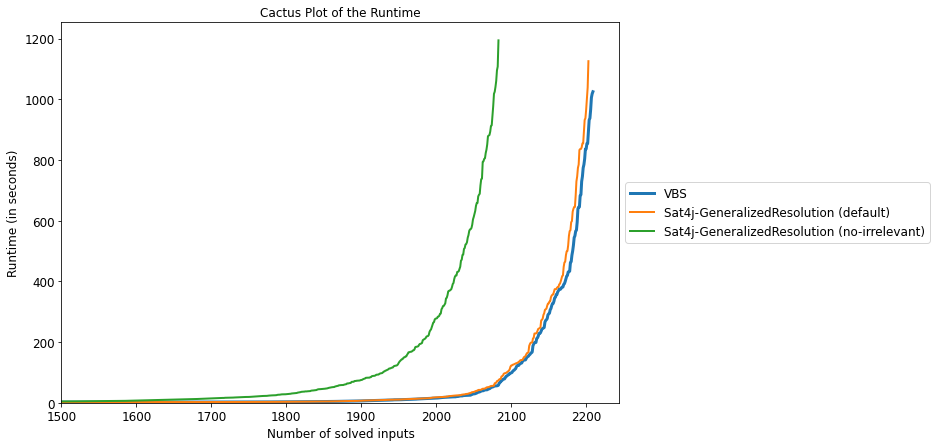

In [7]:
sat4j_optim.get_cactus_plot(cactus_col='cpu_time',
                            x_min=1500,
                            
                            title='Cactus Plot of the Runtime',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

Let us now consider the cactus plot of the number of conflicts encountered by the solver, so as to get insights about the size of the proofs built by the two configurations considered here.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

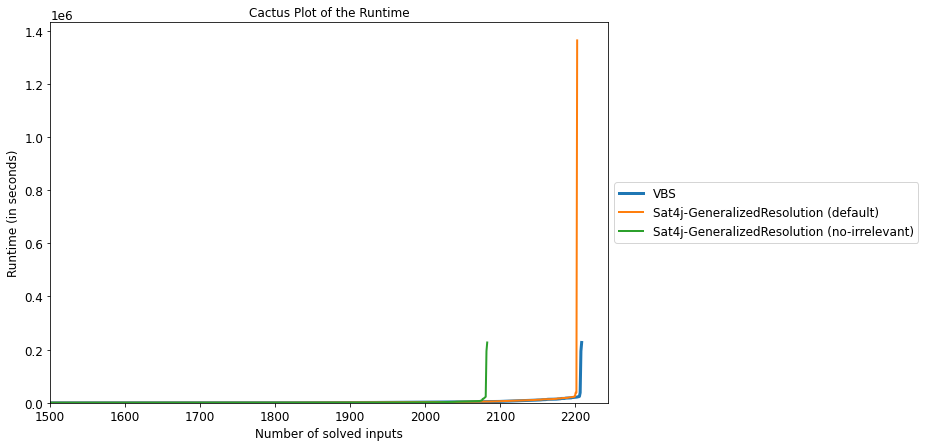

In [8]:
sat4j_optim.get_cactus_plot(cactus_col='conflicts',
                            x_min=1500,
                            
                            title='Cactus Plot of the Runtime',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

A more precise view of the size of the proof may be obtained by looking at the number of cancellations performed
by the solver, instead of the number of conflicts.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

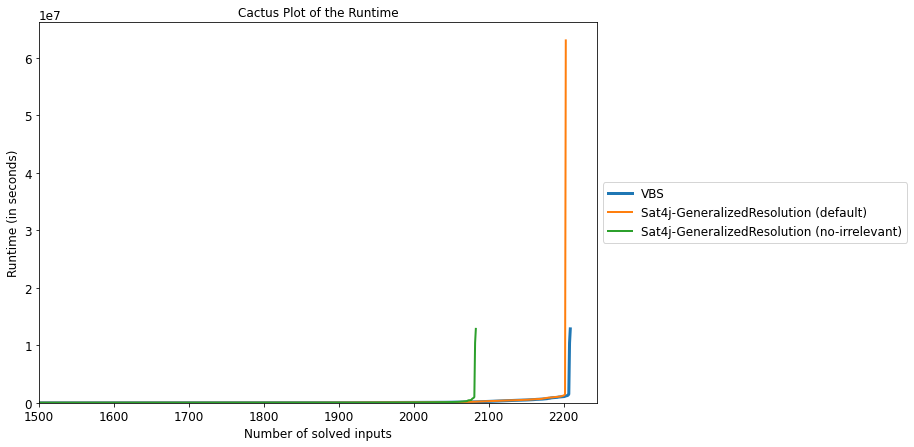

In [9]:
sat4j_optim.get_cactus_plot(cactus_col='steps',
                            x_min=1500,
                            
                            title='Cactus Plot of the Runtime',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

## Pairwise Comparison of the Configurations

Let us now compare the performance of the two configuration of *Sat4j*.

<AxesSubplot:title={'center':'Comparison of Sat4j-GeneralizedResolution (default) and Sat4j-GeneralizedResolution (no-irrelevant)'}, xlabel='Sat4j-GeneralizedResolution (default)', ylabel='Sat4j-GeneralizedResolution (no-irrelevant)'>

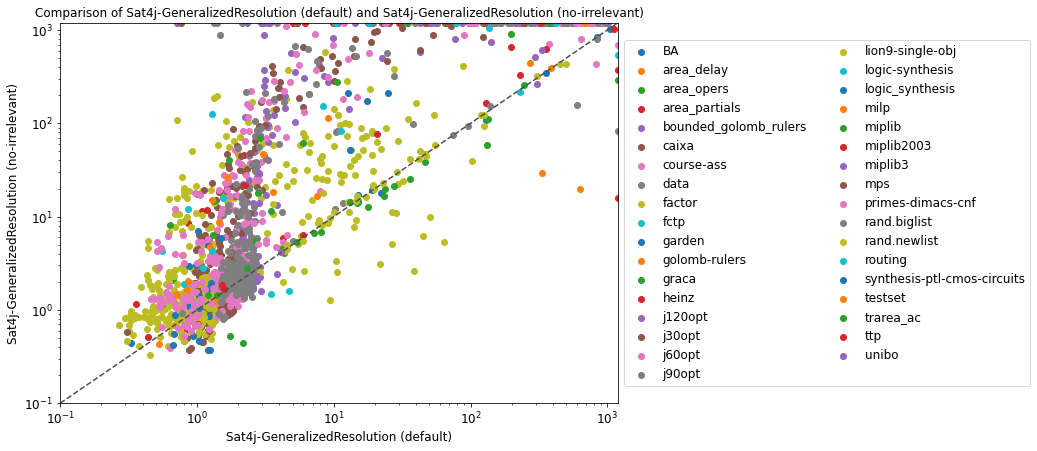

In [10]:
sat4j_optim.get_scatter_plot(scatter_col='cpu_time',
                             xp_ware_x='default',
                             xp_ware_y='irrelevant',
                       
                             title='Scatter-Plot of the Runtime (s)',
                             color_col='family',
                             xp_ware_name_map=solver_map,
                                  
                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,
                                 
                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,
                                 
                             dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of Sat4j-GeneralizedResolution (default) and Sat4j-GeneralizedResolution (no-irrelevant)'}, xlabel='Sat4j-GeneralizedResolution (default)', ylabel='Sat4j-GeneralizedResolution (no-irrelevant)'>

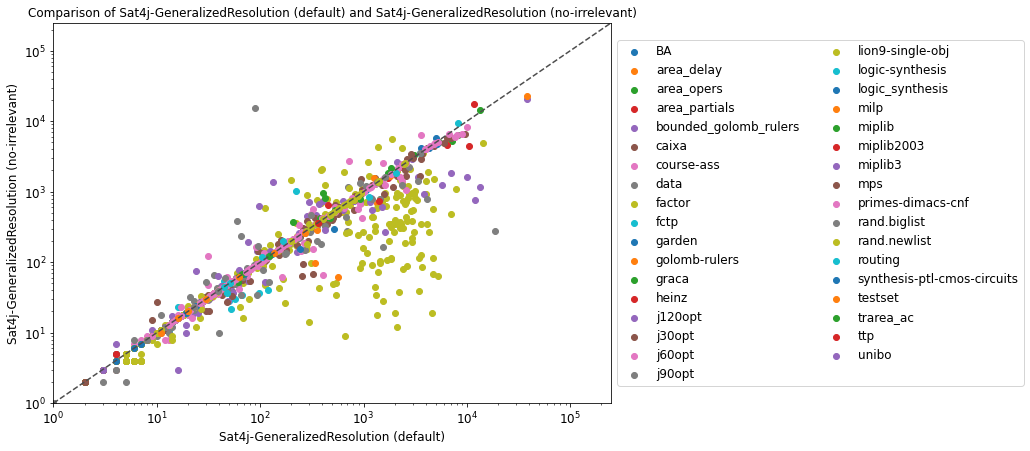

In [11]:
sat4j_optim.sub_analysis('experiment_ware', ['default', 'irrelevant'])\
           .get_only_common_success()\
           .get_scatter_plot(scatter_col='conflicts',
                             xp_ware_x='default',
                             xp_ware_y='irrelevant',     

                             title='Scatter-Plot of the Number of Conflicts',
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=1, x_max=250000, logx=True,
                             y_min=1, y_max=250000, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,

                             figsize=figsize,

                             dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of Sat4j-GeneralizedResolution (default) and Sat4j-GeneralizedResolution (no-irrelevant)'}, xlabel='Sat4j-GeneralizedResolution (default)', ylabel='Sat4j-GeneralizedResolution (no-irrelevant)'>

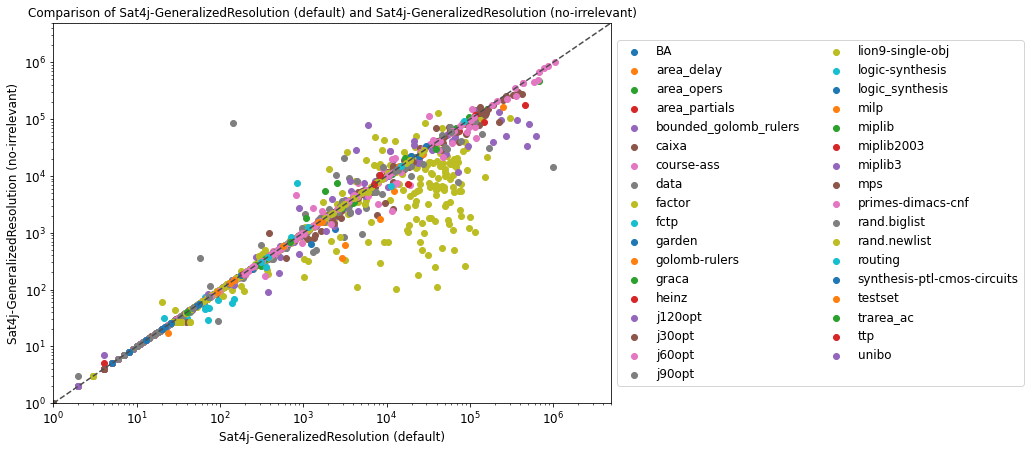

In [12]:
sat4j_optim.sub_analysis('experiment_ware', ['default', 'irrelevant'])\
           .get_only_common_success()\
           .get_scatter_plot(scatter_col='steps',
                             xp_ware_x='default',
                             xp_ware_y='irrelevant',
                       
                             title='Scatter-Plot of the Number of Cancellation Steps',
                             color_col='family',
                             xp_ware_name_map=solver_map,
                                  
                             x_min=1, x_max=5000000, logx=True,
                             y_min=1, y_max=5000000, logy=True,
                                 
                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,
                                 
                             dynamic=dynamic)

## Measure of the Number of Irrelevant Literals

In this section, we draw different figures to study the production of irrelevant literals in *Sat4j*.
To this end, we only consider the solver in which we detect and remove irrelevant literals.

In [13]:
sat4j_irrelevant = sat4j_optim.sub_analysis('experiment_ware', ['irrelevant'])

We will also need additional data, in order to evaluate the presence of irrelevant literals.

In [14]:
def ratio(row, col_a, col_b):
    if row[col_b] == 0:
        return 0
    return row[col_a] / row [col_b]

sat4j_irrelevant = sat4j_irrelevant.map(
    'irrelevant_ratio',
    lambda x: ratio(x, 'nb_irrelevant', 'conflicts'))

sat4j_irrelevant = sat4j_irrelevant.map(
    'constraint_ratio',
    lambda x: ratio(x, 'nb_constraints_with_irrelevant', 'conflicts'))

/Users/romainwallon/Recherche/Articles/On Dedicated CDCL Strategies for PB Solvers/experiments/venv/lib/python3.9/site-packages/metrics/wallet/dataframe/builder.py:87: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We now need to define a custom way of drawing boxplots for our particular case. 

In [15]:
def per_family_boxplot(values, title, log):
    df = sat4j_irrelevant.campaign_df.data_frame
    df = df.pivot(columns='family', values=values)

    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title(title)
    ax.set_xlabel('Family')
    ax.set_xscale('log' if log else 'linear')

    return df.boxplot(ax=ax, rot=0, meanline=True, showmeans=True, vert=False, grid=False)

Let us now draw some box plots.

<AxesSubplot:title={'center':'Number of identified irrelevant literals per family'}, xlabel='Family'>

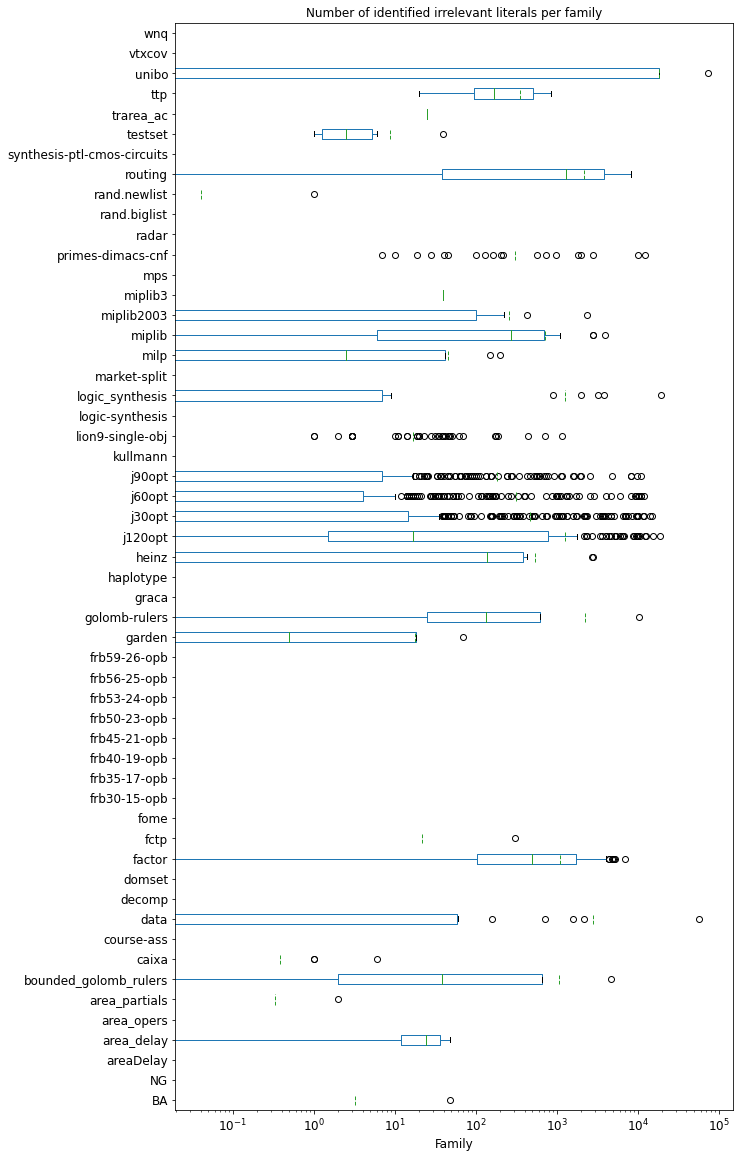

In [16]:
per_family_boxplot(values='nb_irrelevant',
                   title='Number of identified irrelevant literals per family',               
                   log=True)

<AxesSubplot:title={'center':'Number of irrelevant literals per conflict in each family'}, xlabel='Family'>

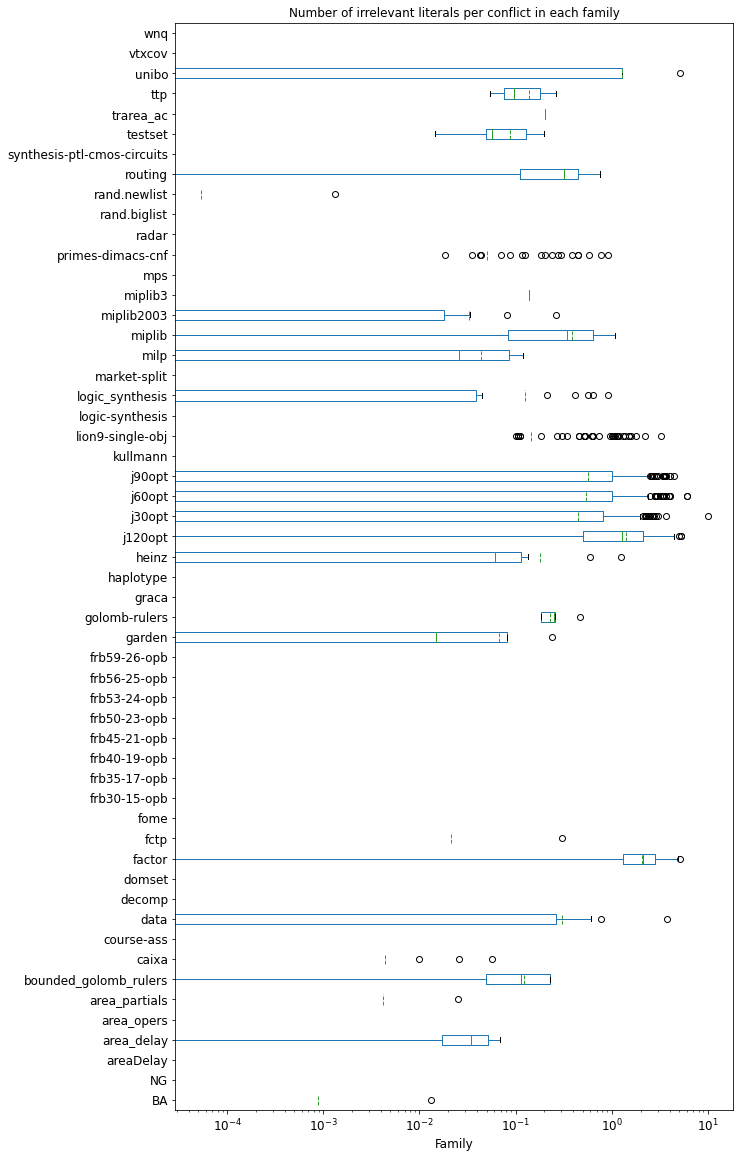

In [17]:
per_family_boxplot(values='irrelevant_ratio',
                   title='Number of irrelevant literals per conflict in each family',               
                   log=True)

<AxesSubplot:title={'center':'Number of Constraints with Irrelevant Literals per Family'}, xlabel='Family'>

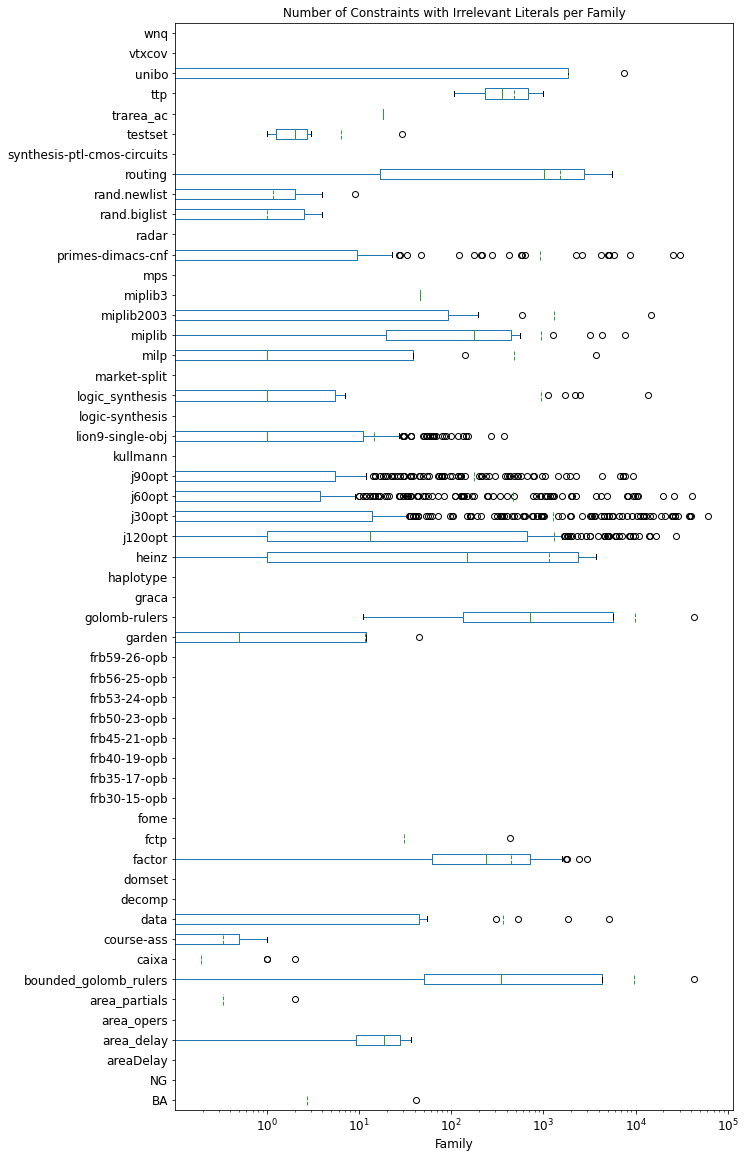

In [18]:
per_family_boxplot(values='nb_constraints_with_irrelevant',
                   title='Number of Constraints with Irrelevant Literals per Family',               
                   log=True)

<AxesSubplot:title={'center':'Number of constraints containing irrelevant literals per conflict in each family'}, xlabel='Family'>

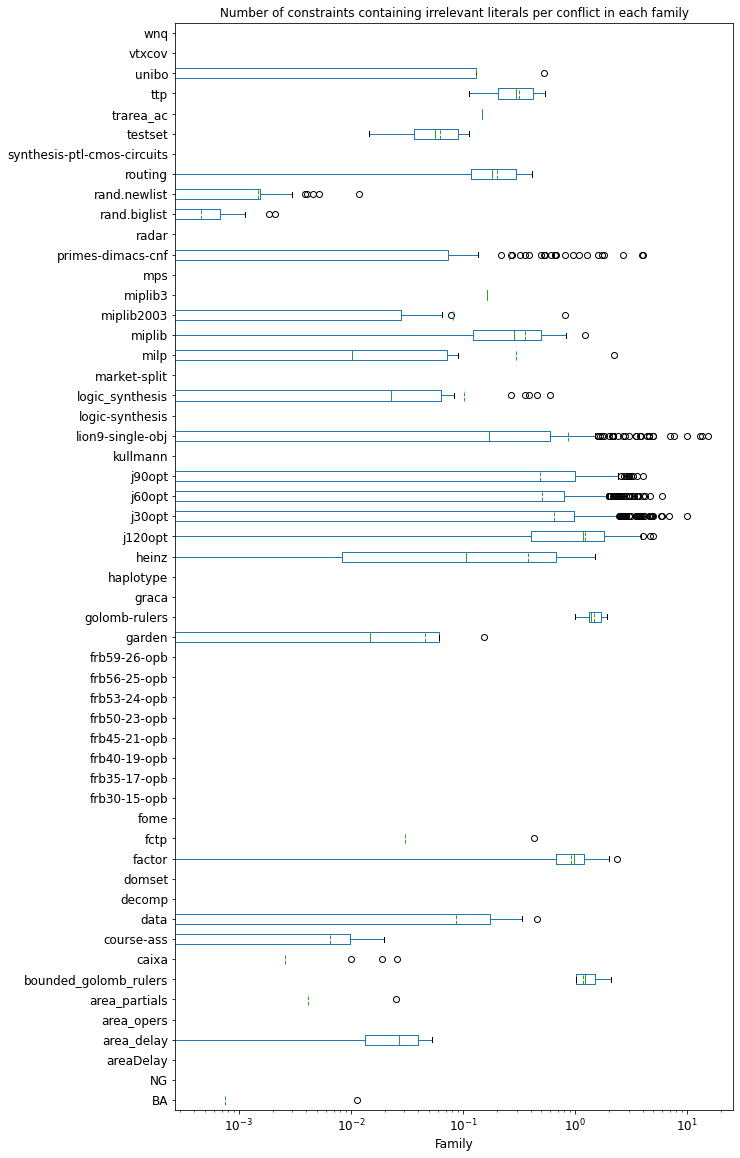

In [19]:
per_family_boxplot(values='constraint_ratio',
                   title='Number of constraints containing irrelevant literals per conflict in each family',               
                   log=True)